In [1]:
import os
os.listdir("chest_xray_covid/Data")

['test', 'train']

In [2]:
Image_size = [64, 64]

train_path = 'chest_xray_covid/Data/train'
test_path = 'chest_xray_covid/Data/test'

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2   # <-- split 20% of train into validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training set (80% of train data)
training_set = train_datagen.flow_from_directory(
    'chest_xray_covid/Data/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training',     # <-- important
    seed=42
)

# Validation set (20% of train data)
val_set = train_datagen.flow_from_directory(
    'chest_xray_covid/Data/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',   # <-- important
    seed=42
)

# Test set (uses separate test folder)
test_set = test_datagen.flow_from_directory(
    'chest_xray_covid/Data/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)



C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/fram

Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.
Found 1289 images belonging to 3 classes.


In [4]:
from keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input


In [5]:
base_model = VGG16(input_shape = (64, 64, 3), include_top=False , weights="imagenet")

In [6]:
inp = base_model.input
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)

output = Dense(3, activation = 'softmax')(x)
model = Model(inputs = inp, outputs = output)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,815,939 (64.15 MB)

 Trainable params: 16,815,939 (64.15 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
test_loss, test_acc = model.evaluate(test_set)

C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.6493 - loss: 1.0104


In [10]:
history = model.fit(training_set, epochs = 10, validation_data = val_set)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 728s 6s/step - accuracy: 0.6689 - loss: 0.8125 - val_accuracy: 0.7471 - val_loss: 0.5952
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 619s 5s/step - accuracy: 0.7983 - loss: 0.5327 - val_accuracy: 0.8619 - val_loss: 0.6541
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 629s 5s/step - accuracy: 0.8683 - loss: 0.3535 - val_accuracy: 0.8920 - val_loss: 0.2943
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 612s 5s/step - accuracy: 0.9135 - loss: 0.2458 - val_accuracy: 0.9426 - val_loss: 0.1685
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 614s 5s/step - accuracy: 0.9288 - loss: 0.2109 - val_accuracy: 0.9358 - val_loss: 0.2083
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 600s 5s/step - accuracy: 0.9339 - loss: 0.1824 - val_accuracy: 0.9173 - val_loss: 0.2400
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 620s 5s/step - accuracy: 0.9473 - loss: 0.1468 - val_accuracy: 0.9339 - val_loss: 0.1808
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 603s 5s/step - accuracy: 0.9483 - loss: 0.1449 - val_accu

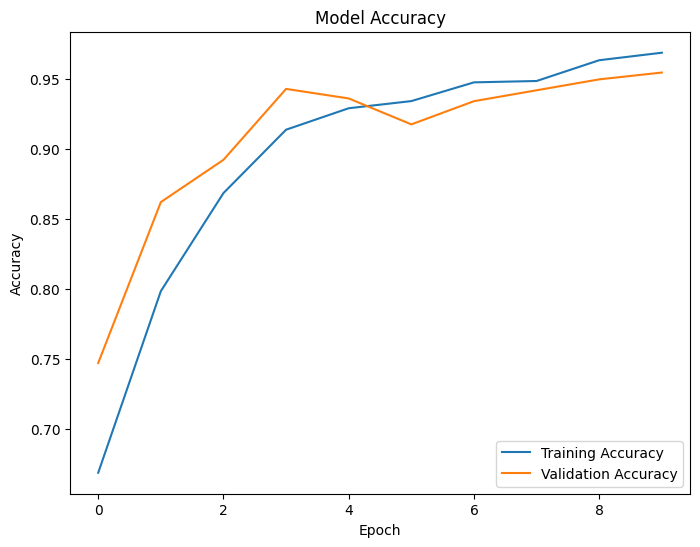

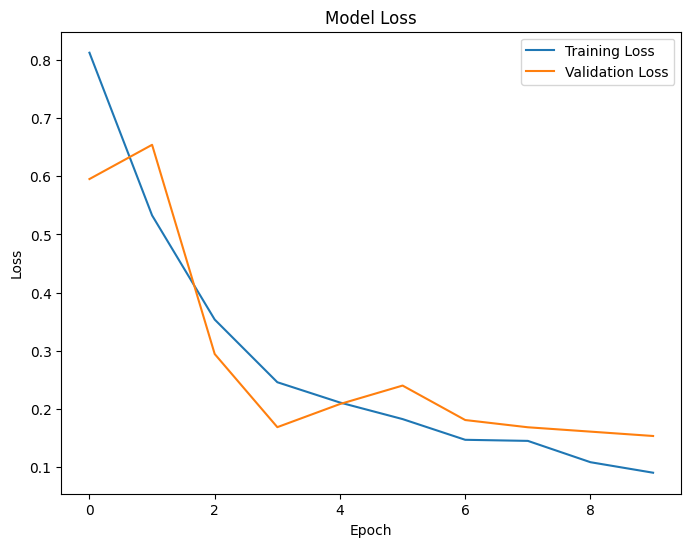

In [11]:
import matplotlib.pyplot as plt

# Assuming you already trained your model
# history = model.fit(...)

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [12]:
!pip install flask pyngrok tensorflow pillow


In [13]:
model.save("covid.h5")

In [14]:
from pyngrok import ngrok

ngrok.set_auth_token("33U3gzBqMxbQLluXgcJCAdjWHD8_5m7BEAzDrAYfRXF1v4Dwp")  # replace with your token


In [15]:
from tensorflow.keras.models import load_model

# Load your trained model (replace with your actual model path)
model = load_model("covid.h5")

# Example: define target size (must match training input size)
IMG_SIZE = (64, 64)   # change based on your model input


In [16]:
from flask import Flask, request, render_template_string
from werkzeug.utils import secure_filename
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os

# -------------------------------
# Initialize Flask app
# -------------------------------
app = Flask(__name__)

UPLOAD_FOLDER = "uploads"
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# -------------------------------
# Model and class labels
# -------------------------------
class_labels = ["COVID-19", "Normal", "Bacteria"]

try:
    model = load_model("covid.h5")  # replace with your model path
except Exception as e:
    print(f"Error loading model: {e}")
    model = None

IMG_SIZE = (64, 64)  # Change to match your model input size

# -------------------------------
# Home route
# -------------------------------
@app.route('/')
def home():
    return render_template_string("""
        <h2>Chest X-ray Classification</h2>
        <form action="/predict" method="post" enctype="multipart/form-data">
            <label>Select an X-ray image:</label>
            <input type="file" name="file" required>
            <button type="submit">Predict</button>
        </form>
    """)

# -------------------------------
# Prediction route
# -------------------------------
@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return "Model is not loaded. Please check server logs."

    if 'file' not in request.files:
        return "No file uploaded."

    file = request.files['file']
    if file.filename == '':
        return "No file selected."

    # Save the uploaded file
    filepath = os.path.join(app.config['UPLOAD_FOLDER'], secure_filename(file.filename))
    file.save(filepath)

    try:
        # Preprocess the image
        img = image.load_img(filepath, target_size=IMG_SIZE)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize

        # Predict
        preds = model.predict(img_array)
        predicted_class_idx = np.argmax(preds, axis=1)[0]
        confidence = np.max(preds)
        predicted_label = class_labels[predicted_class_idx]

    except Exception as e:
        return f"Prediction failed: {e}"

    # Return the result
    return render_template_string("""
        <h2>Prediction Result</h2>
        <p><b>Predicted Class:</b> {{ label }}</p>
        <p><b>Confidence:</b> {{ conf | round(2) }}</p>
        <a href="/">Go Back</a>
    """, label=predicted_label, conf=float(confidence))

# -------------------------------
# Run app
# -------------------------------
if __name__ == "__main__":
    # In Jupyter, avoid signal issues
    app.run(debug=False, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [17]:
!pip install flask pyngrok


In [19]:
import threading

ngrok.kill()


public_url = ngrok.connect(5000)
print(" * Ngrok tunnel URL:", public_url)

def run_app():
    app.run(port=5000)

thread = threading.Thread(target=run_app)
thread.start()


 * Ngrok tunnel URL: NgrokTunnel: "https://nondilatable-evanescently-jeri.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [02/Oct/2025 12:50:59] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


INFO:werkzeug:127.0.0.1 - - [02/Oct/2025 12:51:21] "POST /predict HTTP/1.1" 200 -
